<a href="https://colab.research.google.com/github/ManoelEric1212/IC2_022/blob/main/Q1LogicaFuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite a temperatura: 30
Digite o preço: 3.5
Output 3250.000000000032


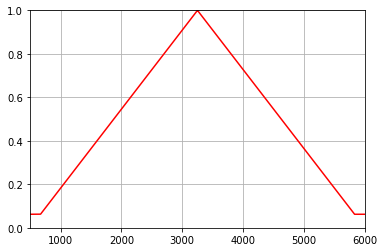

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

#Define a funcao para a distribuicao gaussiana
def gaussiana(x, desvio, intervalo):
    return math.exp(-(x-intervalo)**2/(2*desvio**2))

#Define a funcao para a distribuicao triangular
def triangular(x,a,b,c):
    if x <= a:
        return 0
    if x > a and x <= b:
        return (x - a)/(b-a)
    if x > b and x < c:
        return (c-x)/(c-b)
    if x >=c:
        return 0
    
#Definindo as funcoes de pertinencia
    
# TEMPERATURA
def T_baixo(x):
    return gaussiana(x, 6.369, 15)
def T_med(x):
    return gaussiana(x, 6.369, 30)
def T_alto(x):
    return gaussiana(x, 6.369, 45)
# PRECO
def P_baixo(x):
    return gaussiana(x, 1.061, 1)
def P_medio(x):
    return gaussiana(x, 1.061, 3.5)
def P_alto(x):
    return gaussiana(x, 1.061, 6)
# CONSUMO
def C_baixo(x):
    return triangular(x, -2250, 500, 3250)
def C_medio(x):
    return triangular(x, 500, 3250, 6000)
def C_alto(x):
    return triangular(x, 3250, 6000, 8750)

#Recebendo as entradas
temperatura = float(input("Digite a temperatura: "))
preco = float(input("Digite o preço: "))

#Aplicacao das regras de inferencia sob as entradas fuzzificadas
cg1 = min(T_baixo(temperatura),P_baixo(preco))
# Se a temp é baixa e o preço é baixo, então o consumo é grande
cm1 = min(T_baixo(temperatura),P_medio(preco))
# Se a temp é baixa e o preço é medio, então o consumo é medio
cp1 = min(T_baixo(temperatura),P_alto(preco))
# Se a temp é baixa e o preço é alto, então o consumo é pequeno
cg2 = min(T_med(temperatura),P_baixo(preco))
# Se a temp é media e o preço é baixo, então o consumo é grande
cm2 = min(T_med(temperatura),P_medio(preco))
# Se a temp é media e o preço é medio, então o consumo é medio
cp2 = min(T_med(temperatura),P_alto(preco))
# Se a temp é media e o preço é alto, então o consumo é pequeno
cg3 = min(T_med(temperatura),P_baixo(preco))
# Se a temp é alta e o preço é baixo, então o consumo é grande
cm3 = min(T_med(temperatura),P_medio(preco))
# Se a temp é alta e o preço é medio, então o consumo é medio
cp3 = min(T_med(temperatura),P_alto(preco))
# Se a temp é alta e o preço é alto, então o consumo é pequeno

# Implicacao (min)
def Cp1(x):
    return min(cp1,C_baixo(x))
def Cp2(x):
    return min(cp2,C_baixo(x))
def Cp3(x):
    return min(cp3,C_baixo(x))
def Cm1(x):
    return min(cm1,C_medio(x))
def Cm2(x):
    return min(cm2,C_medio(x))
def Cm3(x):
    return min(cm3,C_medio(x))
def Cg1(x):
    return min(cg1,C_alto(x))
def Cg2(x):
    return min(cg2,C_alto(x))
def Cg3(x):
    return min(cg3,C_alto(x))   

# Agregação
def Saidafuzzy(x):
    return max([Cp1(x), Cp2(x), Cp3(x), Cm1(x), Cm2(x), Cm3(x), Cg1(x), Cg2(x), Cg3(x)])

# Desfuzificacao
x = np.arange(500, 6000.1, 0.5)
y = np.array([])
numerador = 0
denominador = 0
for i in x:
    y = np.append(y, Saidafuzzy(i))
    numerador = numerador + i*Saidafuzzy(i)
    denominador = denominador + Saidafuzzy(i)

out = numerador/denominador
print('Output',out)
plt.plot(x,y, color ='r')
plt.ylim(0,1)
plt.xlim(500,6000)
plt.grid()
plt.show()